In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
# Load the Boston Housing dataset
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1],
data.iloc[:, -1], test_size=0.2, random_state=42)


C:\Users\ziyas\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Define the model
model = tf.keras.models.Sequential([
 tf.keras.layers.Dense(64, activation='relu',
input_shape=(X_train.shape[1],)),
 tf.keras.layers.Dense(32, activation='relu'),
 tf.keras.layers.Dense(1)
])


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='mse')
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 2s 28ms/step - loss: 614.9299 - val_loss: 537.3898
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 581.9008 - val_loss: 508.3814
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 550.1334 - val_loss: 476.6032
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 513.2441 - val_loss: 438.0356
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 466.6504 - val_loss: 389.3545
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 409.2584 - val_loss: 329.3567
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 340.0104 - val_loss: 260.8300
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 262.9370 - val_loss: 191.3005
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 189.6341 - val_loss: 131.0436
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss

11/11 [==============================] - 0s 6ms/step - loss: 11.0429 - val_loss: 17.0247
Epoch 82/100
11/11 [==============================] - 0s 6ms/step - loss: 10.9320 - val_loss: 17.0947
Epoch 83/100
11/11 [==============================] - 0s 6ms/step - loss: 10.6603 - val_loss: 16.4167
Epoch 84/100
11/11 [==============================] - 0s 6ms/step - loss: 10.5100 - val_loss: 16.0827
Epoch 85/100
11/11 [==============================] - 0s 6ms/step - loss: 10.3674 - val_loss: 16.5105
Epoch 86/100
11/11 [==============================] - 0s 6ms/step - loss: 10.3150 - val_loss: 16.3108
Epoch 87/100
11/11 [==============================] - 0s 6ms/step - loss: 10.2482 - val_loss: 15.6942
Epoch 88/100
11/11 [==============================] - 0s 6ms/step - loss: 10.1216 - val_loss: 15.4937
Epoch 89/100
11/11 [==============================] - 0s 6ms/step - loss: 10.0774 - val_loss: 15.5490
Epoch 90/100
11/11 [==============================] - 0s 6ms/step - loss: 9.9980 - val_loss: 14

In [6]:
model.evaluate(X_test, y_test)


4/4 [==============================] - 0s 4ms/step - loss: 12.8474


12.84736442565918

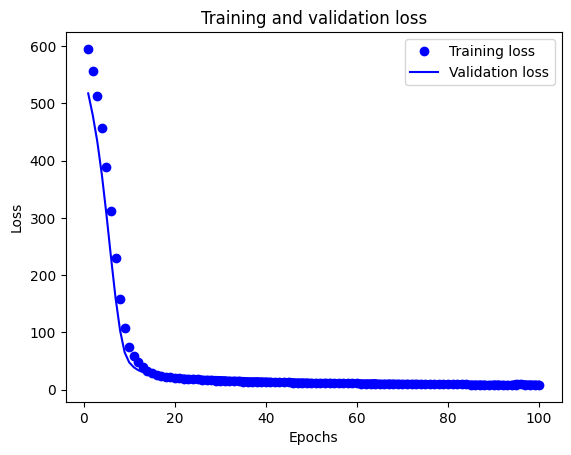

In [7]:
# Visualize the training history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


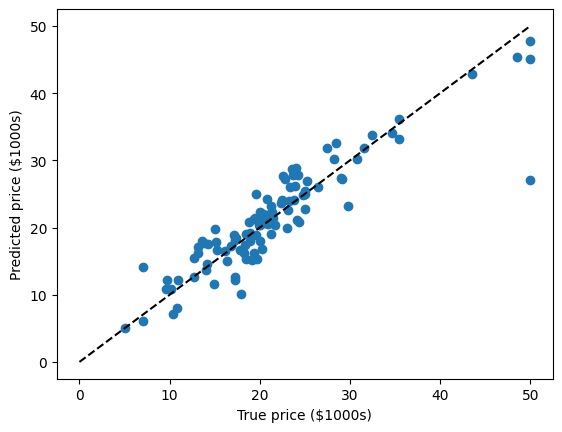

In [7]:
# Visualize the linear regression graph
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.show()